# RTT analyses 

This notebook contains the analyses performed for the _"Evaluating Wi-Fi Round Trip Time for Accurate Indoor Positioning with Android Smartphones"_ conference paper.

The contained analyses are:
1. Temporal variability or RTT measures.
2. Impact of the angle of incidence (AoI).
3. RTT sampling interval limitations.
4. Variability of RTT measures from multiple emitters in several reference locations.

## Imports

In [1]:
import os
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

from PIL import Image
from plotly.subplots import make_subplots

In [2]:
INPUT_DATA_DIR = '01_DATA'
POCO_MEASUREMENTS = os.path.join(INPUT_DATA_DIR, '01_rtt-poco.csv')
M2007_MEASUREMENTS = os.path.join(INPUT_DATA_DIR, '01_rtt-xiaomi-m2007.csv')
ORIENTATIONS_MEASURMENTS = os.path.join(INPUT_DATA_DIR, '02_rtt-orientations.csv')
THROTTLE_MEASURMENTS = os.path.join(INPUT_DATA_DIR, '03_rtt-throttle.csv')
MULTIPLE_EMITTERS_MEASUREMENTS = {
    'P1': os.path.join(INPUT_DATA_DIR, '04_P1-rtt.csv'),
    'P2': os.path.join(INPUT_DATA_DIR, '04_P2-rtt.csv'),
    'P3': os.path.join(INPUT_DATA_DIR, '04_P3-rtt.csv')
}
FLOORMAP = os.path.join(INPUT_DATA_DIR, '04_basemap.jpg')

RESULTS_DATA_DIR = '02_RESULTS'
TEMPORAL_VARIABILITY_POCO = os.path.join(RESULTS_DATA_DIR, '01_rtt-variability-poco.pdf')
TEMPORAL_VARIABILITY_M2007 = os.path.join(RESULTS_DATA_DIR, '01_rtt-variability-m2007.pdf')
ORIENTATIONS_RESULTS = os.path.join(RESULTS_DATA_DIR, '02_rtt-orientations.pdf')
THROTTLE_RESULTS = os.path.join(RESULTS_DATA_DIR, '03_rtt-throttle.pdf')
MULTIPLE_EMITTERS_COLLECTION_ENV = os.path.join(INPUT_DATA_DIR, '04_collection-environment.jpg')
MULTIPLE_EMITTERS_ERRORS_FIG = os.path.join(RESULTS_DATA_DIR, '04_rtt-multiple-emitters.pdf')
MULTIPLE_EMITTERS_ERRORS_TABLE = os.path.join(RESULTS_DATA_DIR, '04_rtt-multiple-emitters.csv')

REFERENCE_LOCATIONS = {
    'P1': [3.91, 7.76],
    'P2': [4, 2.10],
    'P3': [1.19, 14.14],
}

APS_LOCATIONS = {
    '90:ca:fa:8b:13:b4': (4.0, 1.10),
    '90:ca:fa:8b:26:29': (0.21, 1.17),
    '24:e5:0f:2c:ff:15': (4.84, 14.65),
    '24:e5:0f:2d:13:79': (0.17, 14.74)
}

APS_IDS = {
    '90:ca:fa:8b:13:b4': 'AP1',
    '90:ca:fa:8b:26:29': 'AP2',
    '24:e5:0f:2c:ff:15': 'AP3',
    '24:e5:0f:2d:13:79': 'AP4'
}

LAB_WIDTH = 6.34
LAB_HEIGHT = 14.94

HEIGHT = 500
WIDTH = 700

FONT_SIZE = 18

## Analysis

### Temporal variability of RTT measures

Analysis of the temporal evolution and accuracy of RTT measurements collected at 1000, 2000, 3000, 4000 and 5000 millimeters from the AP. The data was collected with two Android smartphones and locations: Xiaomi Poco F2 Pro (M2004J11G) in a research laboratory and a Xiaomi Mi 10T (M2007J3SG) in an urban home.

#### Data loading

In [3]:
poco = pd.read_csv(POCO_MEASUREMENTS)
m2007 = pd.read_csv(M2007_MEASUREMENTS)
poco = poco[poco['Real Distance (mm)'].isin([1000, 2000, 3000, 4000, 5000])]
poco['Real Distance (mm)'] = poco['Real Distance (mm)'].astype(str)
m2007['Real Distance (mm)'] = m2007['Real Distance (mm)'].astype(str)

#### Results

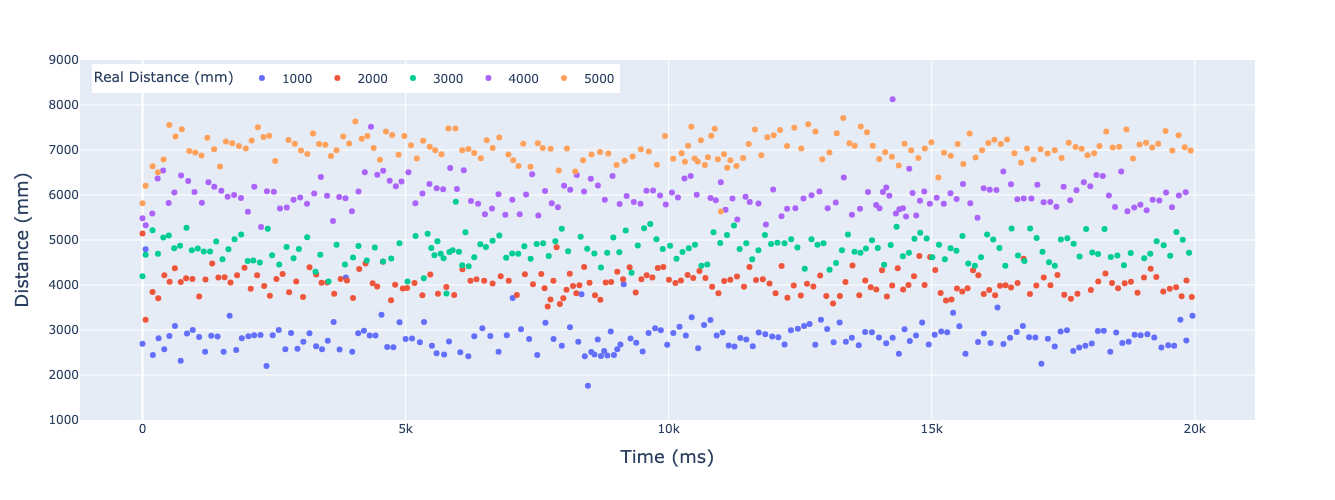

In [4]:
poco_fig = px.scatter(poco, x='Time (ms)', y='Distance (mm)', color='Real Distance (mm)')

poco_fig.update_layout(width=WIDTH, height=HEIGHT, 
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        orientation='h'
    ), yaxis_range=[1000, 9000], xaxis_title_font_size=FONT_SIZE, yaxis_title_font_size=FONT_SIZE)

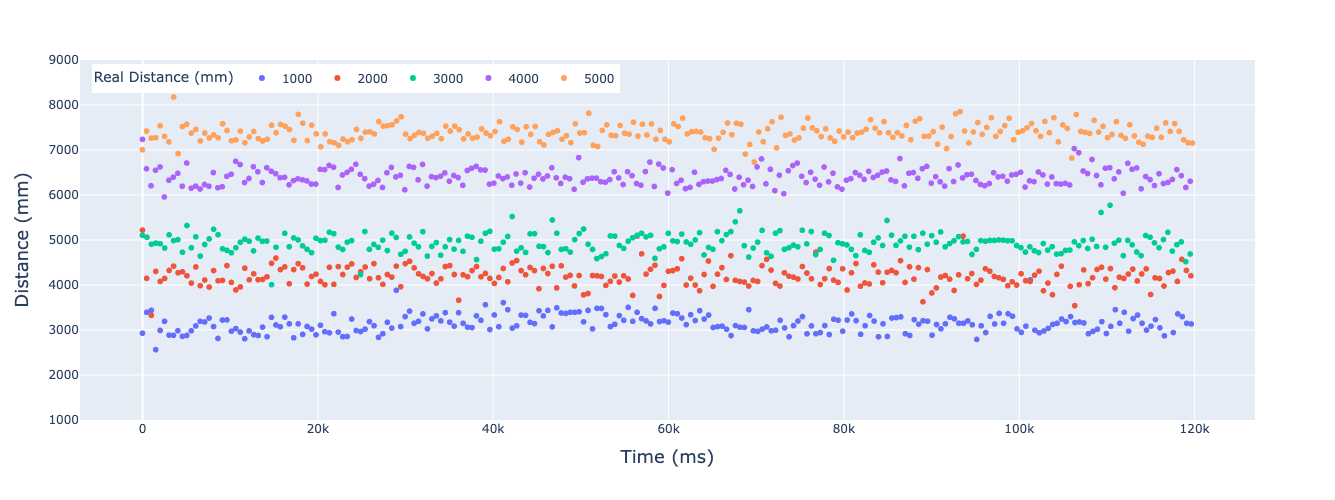

In [5]:
m2007_fig = px.scatter(m2007, x='Time (ms)', y='Distance (mm)', color='Real Distance (mm)')

m2007_fig.update_layout(width=WIDTH, height=HEIGHT, 
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        orientation='h'
    ), yaxis_range=[1000, 9000], xaxis_title_font_size=FONT_SIZE, yaxis_title_font_size=FONT_SIZE)

### Impact of the Angle of Incidence (AoI)

Analysis of the orientation of the smartphone with respect to the AP. The RTT measurements were collected at 0.5 meters from the AP with the Xiaomi Poco F2 Pro (M2004J11G) in a research laboratory.

#### Data loading

In [6]:
orientations = pd.read_csv(ORIENTATIONS_MEASURMENTS)
orientations['Orientation'] = orientations['Orientation'].map({1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E'})

#### Results

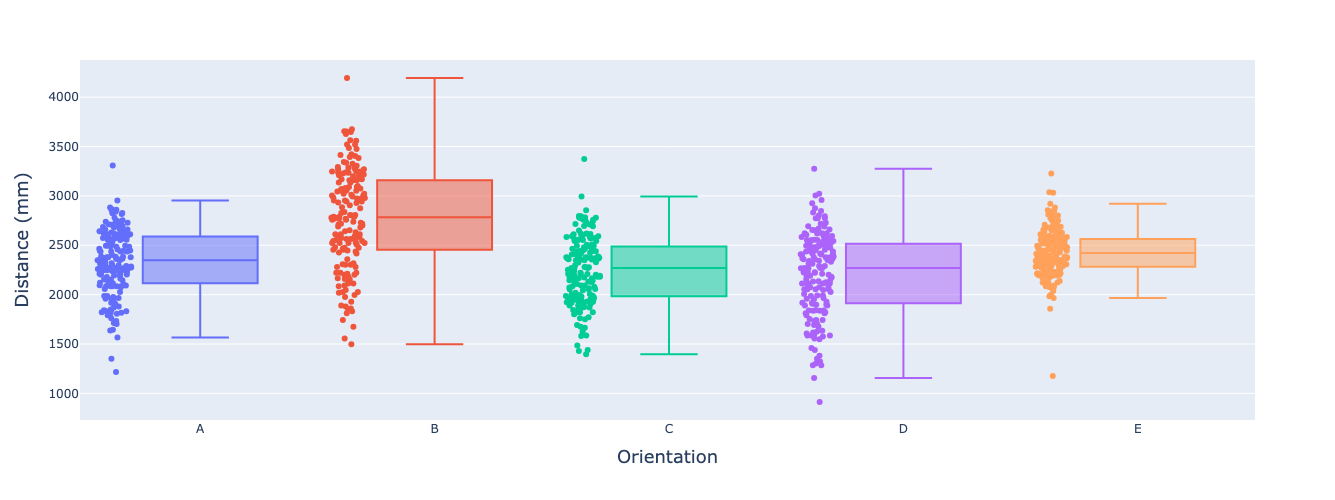

In [7]:
orientation_fig = px.box(orientations, x='Orientation', y='Distance (mm)', points="all", color='Orientation')

orientation_fig.update_layout(
    height=HEIGHT,
    width=WIDTH,
    showlegend=False, 
    xaxis_title_font_size=FONT_SIZE, 
    yaxis_title_font_size=FONT_SIZE
)

### RTT sampling interval limitations

Analysis of the quantity of RTT measurments received with several sampling interval configurations.

#### Data loading

In [8]:
throttle = pd.read_csv(THROTTLE_MEASURMENTS)
throttle['Interval (ms)'] = throttle['Interval (ms)'] * -1
throttle['Expected Measurements'] = (1/throttle['Interval (ms)'] * 1000 * 30).apply(np.floor)

#### Results

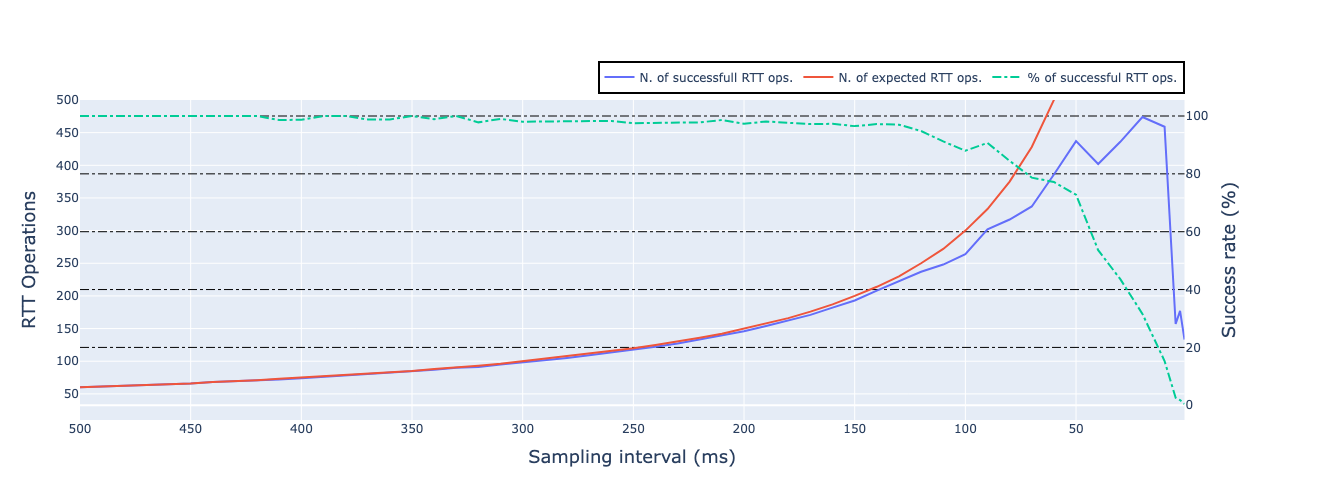

In [9]:
throttle_fig = make_subplots(specs=[[{"secondary_y": True}]])

throttle_fig.add_trace(
    go.Scatter(x=throttle['Interval (ms)'], y=throttle['Successful Measurements'], name="N. of successfull RTT ops."),
    secondary_y=False,
)

throttle_fig.add_trace(
    go.Scatter(x=throttle['Interval (ms)'], y=throttle['Expected Measurements'], name="N. of expected RTT ops."),
    secondary_y=False,
)

throttle_fig.add_trace(
    go.Scatter(x=throttle['Interval (ms)'], y=throttle['% Successful Operations'], line_dash='dashdot', name="% of successful RTT ops."),
    secondary_y=True,
)

throttle_fig.update_layout(height=HEIGHT, width=WIDTH + 100,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=0.94,
        bordercolor="Black",
        borderwidth=2
    ))
throttle_fig.update_xaxes(title_text="Sampling interval (ms)", title_font_size=FONT_SIZE, autorange='reversed', dtick=50)
throttle_fig.update_yaxes(title_text="RTT Operations", title_font_size=FONT_SIZE, secondary_y=False, dtick=50, range=(10, 500))
throttle_fig.update_yaxes(title_text="Success rate (%)", title_font_size=FONT_SIZE, secondary_y=True, griddash='dashdot', gridcolor='black')

### Variability of RTT measures from multiple emitters in several reference locations

Analysis of accuracy of RTT measurements collected at three reference points from four AP deployed in the research laboratory. The RTT measurements were collected with the Xiaomi Poco F2 Pro (M2004J11G).

#### Data collection environment

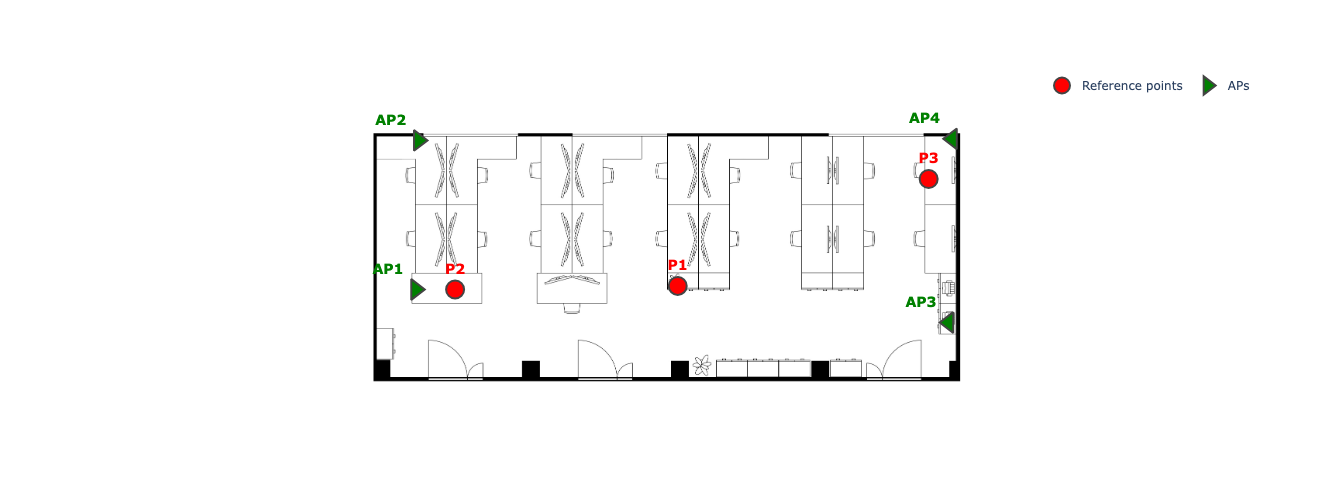

In [10]:
SYMBOLS = {
    'AP1': 'triangle-right',
    'AP2': 'triangle-right',
    'AP3': 'triangle-left',
    'AP4': 'triangle-left',
}

def plot_collection_environment():
    fig=go.Figure()
    fig = add_reference_points(fig)
    fig = add_aps(fig)
    fig = add_floorplan(fig)
    fig = add_style(fig)
    return fig


def add_reference_points(fig):
    points_identifiers = list(REFERENCE_LOCATIONS.keys())
    points_x = [location[1] for location in REFERENCE_LOCATIONS.values()]
    points_y = [location[0] for location in REFERENCE_LOCATIONS.values()]
    fig.add_trace(
        go.Scatter(
            x=points_x, y=points_y, name="Reference points", legendgroup='1',
            mode='markers+text', marker_size=18, marker_color='red', marker_line_width=2,
            text=points_identifiers, texttemplate="<b>%{text}</b>", textposition="top center", textfont_color='red', textfont_size=14
        )
    )
    return fig


def add_aps(fig):
    aps_x = [ap[1] for ap in APS_LOCATIONS.values()]
    aps_y = [ap[0] for ap in APS_LOCATIONS.values()]
    aps_identifiers = [APS_IDS[ap_id] for ap_id in APS_LOCATIONS.keys()]
    fig.add_trace(
        go.Scatter(
            x=aps_x, y=aps_y, name='APs', mode='markers+text',  
            marker=dict(symbol=[SYMBOLS[identifier] for identifier in aps_identifiers],
                        opacity=1, color='green', size=18, line=dict(width=2)), 
            text=aps_identifiers, texttemplate="<b>%{text}</b>", textposition='top left', textfont_color='green', textfont_size=14
        )
    )
    return fig


def add_floorplan(fig):
    fig.add_layout_image(
        dict(
            source=Image.open(FLOORMAP),
            xref="x", x=0, xanchor="left", sizey=LAB_WIDTH,
            yref="y", y=0, yanchor='top', sizex=LAB_HEIGHT,
            sizing="stretch",
            opacity=1,
            layer="below"
        )
    )
    return fig


def add_style(fig):
    fig.update_layout(
        width=750, height=HEIGHT, plot_bgcolor='white', 
        legend=dict(orientation="h", yanchor="bottom", y=1, xanchor="right", x=1),
    )
    fig.update_xaxes(showgrid=False, showticklabels=False, tickmode="linear", range=[0, 15])
    fig.update_yaxes(showgrid=False, showticklabels=False, tickmode="linear", range=[6.5, 0], scaleanchor="x", scaleratio=1)
    return fig


collection_env = plot_collection_environment()
collection_env

#### Data loading

In [11]:
def load_multiple_ap_measurements():
    dfs = []
    for reference_location, measurements_file in MULTIPLE_EMITTERS_MEASUREMENTS.items():            
        measurements = pd.read_csv(measurements_file)
        measurements['Reference Position'] = reference_location
        measurements['AP'] = measurements['AP MAC Address'].apply(lambda x: APS_IDS[x])
        measurements['Real Distance (mm)'] = measurements['AP MAC Address'].apply(lambda x: euclidean_distance(*REFERENCE_LOCATIONS[reference_location], *APS_LOCATIONS[x]) * 1000)
        measurements['Error (mm)'] = measurements['Distance (mm)'] - measurements['Real Distance (mm)']
        dfs.append(measurements)
    return pd.concat(dfs).sort_values(['Reference Position', 'AP'])


def euclidean_distance(x1, y1, x2, y2):
    p1 = np.array((x1 ,y1))
    p2 = np.array((x2, y2))
    return np.linalg.norm(p1 - p2)


multiple_emitters = load_multiple_ap_measurements()

#### Results

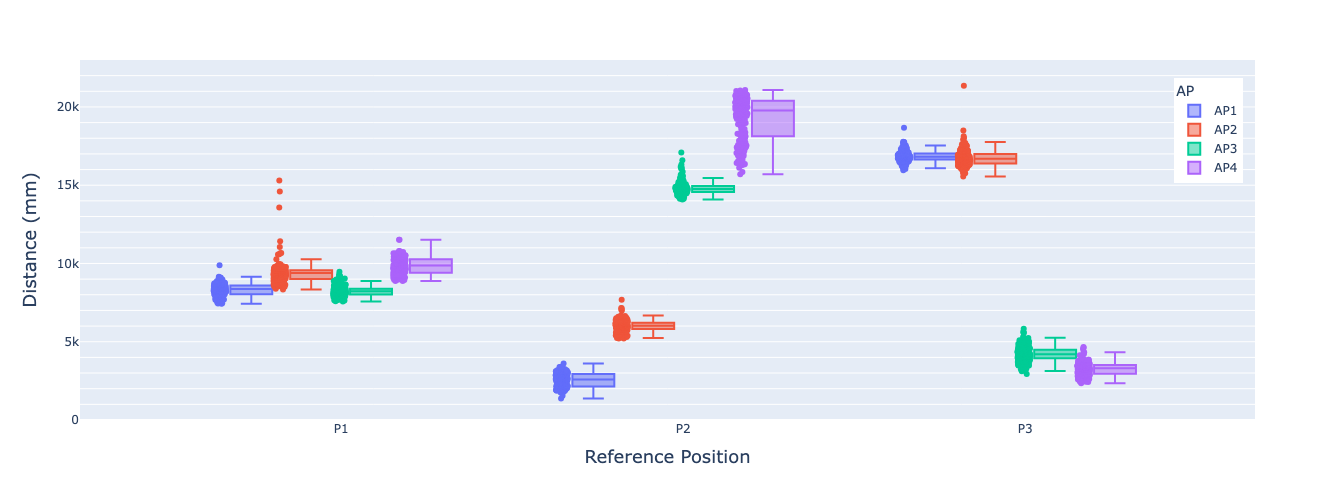

In [12]:
multiple_emitters_fig = px.box(multiple_emitters, y='Distance (mm)', x='Reference Position', color='AP', points='all', width=WIDTH*2, height=HEIGHT)
multiple_emitters_fig.update_layout(
    xaxis_title_font_size=FONT_SIZE, yaxis_title_font_size=FONT_SIZE,
    legend=dict(yanchor="top", y=0.95, xanchor="right", x=0.99),
    yaxis_range=[0, 23000], yaxis_dtick=1000, yaxis_ticklabelstep=5)

multiple_emitters_fig

In [13]:
errors_by_ap_and_position = multiple_emitters[['Distance (mm)', 'Real Distance (mm)', 'Reference Position', 'AP']].groupby(['Reference Position', 'AP']).mean()
errors_by_ap_and_position['Error'] = errors_by_ap_and_position['Distance (mm)'] - errors_by_ap_and_position['Real Distance (mm)']
errors_by_ap_and_position

Distance (mm)  Real Distance (mm)        Error
Reference Position AP                                                 
P1                 AP1    8318.357843         6660.608080  1657.749763
                   AP2    9577.049020         7557.651752  2019.397268
                   AP3    8443.575610         6952.481571  1491.094038
                   AP4   10037.382353         7918.838299  2118.544054
P2                 AP1    2545.420290         1000.000000  1545.420290
                   AP2    6219.666667         3902.435137  2317.231529
                   AP3   14821.420290        12578.080140  2243.340150
                   AP4   19260.666667        13207.516799  6053.149868
P3                 AP1   16845.133663        13339.329069  3505.804595
                   AP2   16759.618812        13006.971208  3752.647604
                   AP3    4418.217822         3685.457909   732.759913
                   AP4    3666.490099         1183.384975  2483.105124

## Storing results

In [14]:
poco_fig.write_image(TEMPORAL_VARIABILITY_POCO)
m2007_fig.write_image(TEMPORAL_VARIABILITY_M2007)
orientation_fig.write_image(ORIENTATIONS_RESULTS)
throttle_fig.write_image(THROTTLE_RESULTS)
collection_env.write_image(MULTIPLE_EMITTERS_COLLECTION_ENV)
multiple_emitters_fig.write_image(MULTIPLE_EMITTERS_ERRORS_FIG)
errors_by_ap_and_position.to_csv(MULTIPLE_EMITTERS_ERRORS_TABLE)